# Machine Learning Toolboxes in Python

## Linear Regression in IPython

**Alireza Mirdamadi**   
<AMi@ngi.no>

# Introduction
This notebook is the first notebook of "Machine Learning Toolboxes in Python" series. In this Jupyter Notebook, some of the important methods of performing linear regression in IPython are presented.

# Simple Linear Regression
Technically this means one predictor is linearly related to the response. $$ Y = \beta_0 +  \beta_1 X + \epsilon$$

There are two unknown constants that we need to estimate, the intercept $\beta_0$ and the slope, $\beta_1$. Also called coefficients or parameters. Once they are estimated, the estimated fit becomes $$ \hat{Y} = \hat{\beta_0} +  \hat{\beta_1} X$$

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [11]:
#reading the data from a csv file
Nkt_data = pd.read_csv('data.csv', usecols=range(0,22))
Nkt_data.head()

,Site,Borehole/Test No.,Depth,Test,wn,LL,PL,PI,K0,G50,...,qnet,Nkt,sigma_vo,uo,qt,u2,fs,Qt,Bq,Fr
0,OS,BL1,7.18,CAUC,63.74,64.5,28.6,35.9,0.629938,3916.083916,...,262.892000,10.229261,115.598000,61.800,378.490000,248.30000,7.60000,4.886650,0.709417,2.890921
1,OS,BL1,12.62,CAUC,63.41,71.8,30.3,41.5,0.631117,5661.124307,...,398.998000,11.666608,203.182000,116.200,602.180000,420.60000,11.40000,4.587133,0.762911,2.857157
2,OS,BL1,14.73,CAUC,64.27,74.0,33.3,40.7,0.630033,6356.164384,...,444.658000,12.926105,236.992000,137.200,681.650000,465.50000,14.10000,4.455848,0.738320,3.170976
3,BW,B1SBS5,6.65,CAUC,105.30,96.3,35.0,61.3,0.788290,1148.072056,...,199.396559,8.822857,92.439676,54.936,289.290454,153.08904,4.09284,5.248840,0.498616,2.079159
4,BW,B1SBS10,8.45,CAUC,74.40,83.0,32.5,50.5,0.733534,2761.144582,...,236.442965,11.477814,118.385349,72.594,344.476045,131.65900,6.18892,4.937411,0.261245,2.737362


In [12]:
#Nkt_data = Nkt_data.replace("-", np.NaN)

In [13]:
#Nkt_data = pd.DataFrame(Nkt_data)

In [14]:
Nkt_data.describe()

,Depth,wn,LL,PL,PI,K0,G50,Ir,su,qnet,Nkt,sigma_vo,uo,qt,u2,fs,Qt,Bq,Fr
count,98.000000,98.000000,98.000000,98.000000,98.000000,84.000000,84.000000,84.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,9.283673,98.488367,113.357143,44.663265,68.739796,0.567251,1595.526583,84.366680,17.824490,241.005703,14.324667,118.967495,83.097097,370.473429,206.938314,10.388455,6.689509,0.490456,6.078480
std,4.705947,27.400844,33.024998,12.674688,21.967580,0.111947,1434.163279,45.052702,13.467372,170.924263,4.195388,71.209877,45.263887,228.904794,115.053594,11.299161,3.734165,0.119726,2.783785
min,0.280000,19.040000,36.400000,16.400000,20.000000,0.440000,100.683404,15.625000,2.600000,26.576667,6.579171,2.700000,2.000000,29.276667,9.666667,2.293333,3.946158,0.239288,1.672329
25%,5.497500,78.300000,83.025000,33.300000,50.425000,0.458880,533.607143,50.393512,10.000000,139.159030,11.184295,54.425000,47.007750,211.344530,114.871750,5.154250,4.921685,0.421806,2.984626
50%,8.800000,105.300000,124.500000,44.600000,74.150000,0.565027,1340.166667,71.045885,16.250000,239.576200,13.451683,116.242000,73.500000,372.495500,197.550000,8.260000,6.121790,0.475356,6.761261
75%,13.132500,117.000000,143.000000,56.000000,87.000000,0.630033,2045.864016,109.410510,22.300000,298.534905,16.622072,185.715758,118.125750,486.260968,289.235160,12.407500,7.225121,0.557888,8.034272
max,19.460000,152.200000,159.000000,66.000000,109.900000,0.902341,7883.091905,210.341749,90.200000,1203.871040,25.702775,249.900000,181.000000,1478.369600,465.700000,86.295000,37.966667,0.762911,12.498996


NameError: name 'savefig' is not defined

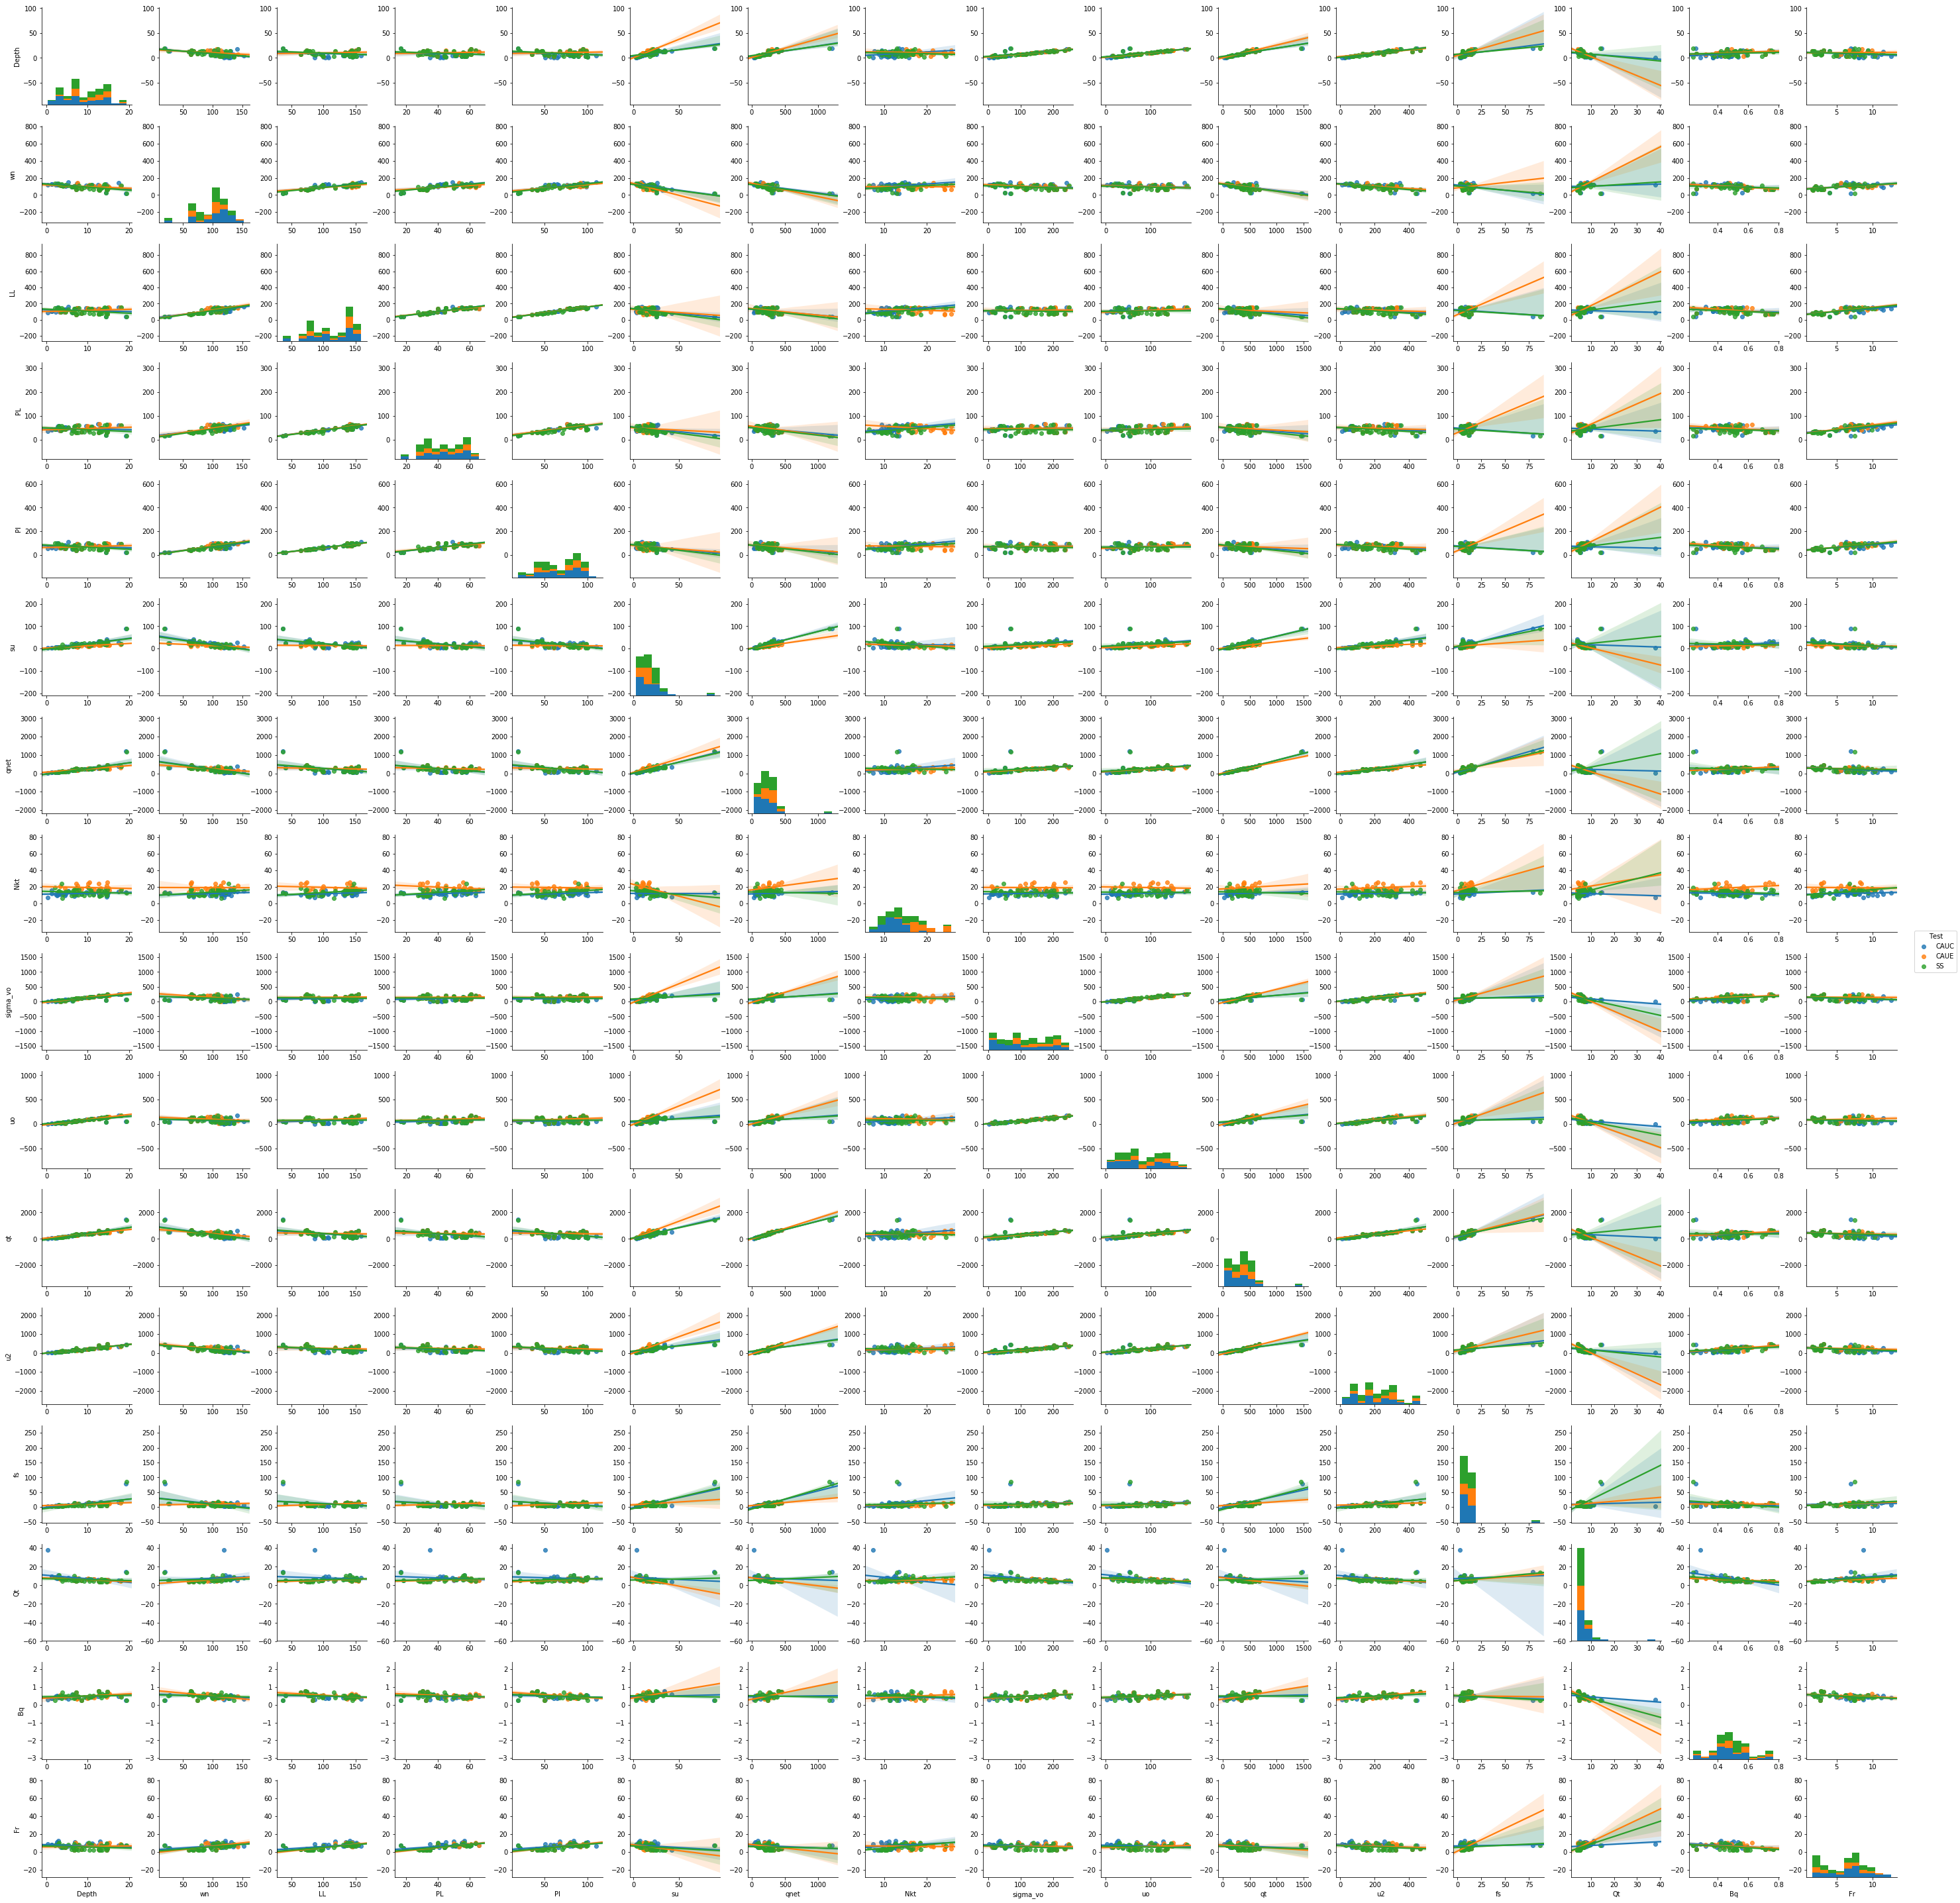

In [15]:
Nkt_plot = sns.pairplot(Nkt_data.dropna(axis=1),kind="reg", hue='Test');

In [17]:
Nkt_plot.savefig('plot.png')

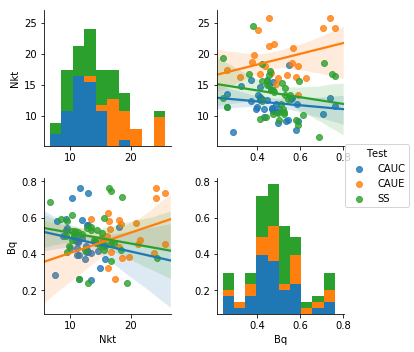

In [18]:
Nkt_plot2 = sns.pairplot(Nkt_data,kind="reg", vars=["Nkt" , "Bq"], hue='Test');

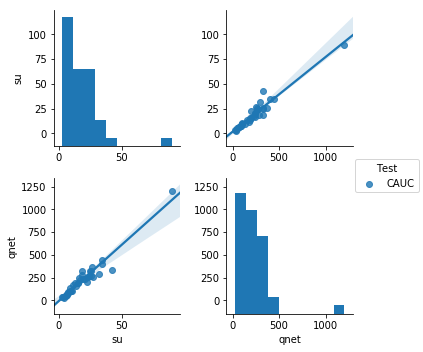

In [19]:
Nkt_plot2 = sns.pairplot(Nkt_data.loc[Nkt_data['Test']=='CAUC'],kind="reg", vars=["su" , "qnet"], hue='Test');

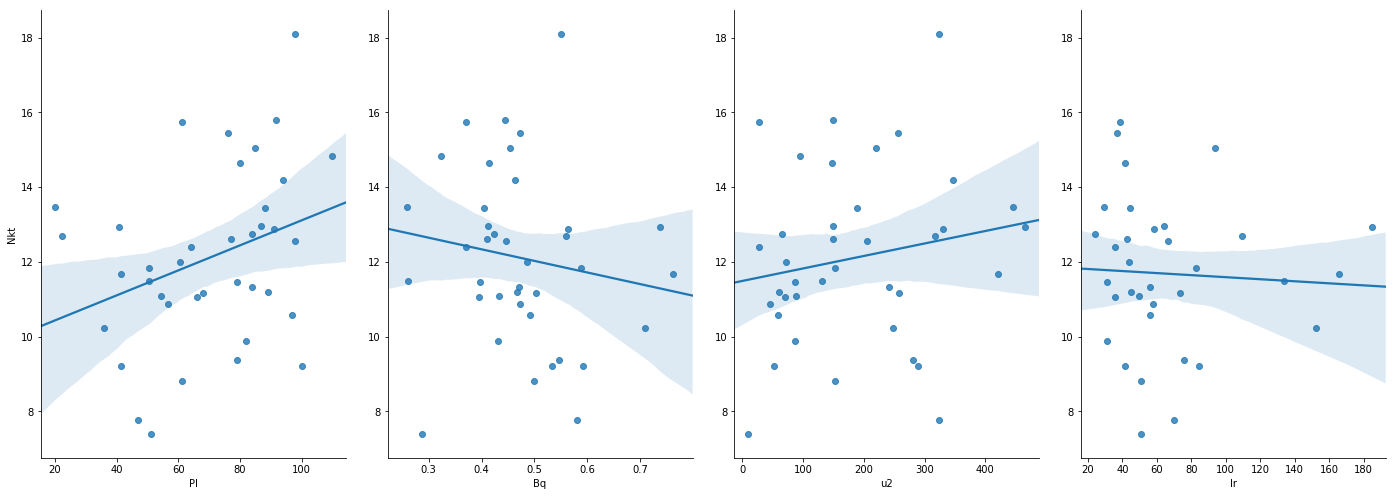

In [21]:
data=Nkt_data.loc[Nkt_data['Test']=='CAUC']
Fig2=sns.pairplot(data, x_vars=['PI','Bq','u2','Ir'], y_vars='Nkt', size=7, aspect=0.7, kind='reg', dropna=True)

In [22]:
Fig2.savefig('plot2.png')

# Using the numpy library
NumPy is the fundamental package for scientific computing with Python. [numpy library](https://docs.scipy.org/doc/numpy-dev/index.html)

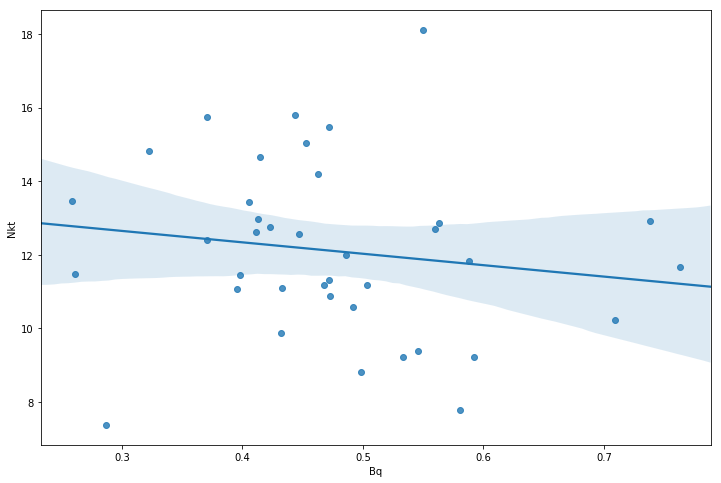

In [9]:
plt.figure(figsize=(12, 8))
sns.regplot('Bq', 'Nkt', data=Nkt_data.loc[Nkt_data['Test']=='CAUC']);

The line above was fitted using numpy's polyfit function, with a final model of $\hat{Y} = 0.048X+7$

# Using the statsmodels library
The excellent [statsmodels library](http://statsmodels.sourceforge.net/) integrates neatly with the pandas dataframe to do statistical analysis. Some simple

In [25]:
import statsmodels.formula.api as smf

In [26]:
df=Nkt_data.loc[Nkt_data['Test']=='CAUC']
results = smf.ols('Nkt ~ Bq', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Nkt   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8546
Date:                Thu, 30 Nov 2017   Prob (F-statistic):              0.361
Time:                        14:32:29   Log-Likelihood:                -85.193
No. Observations:                  38   AIC:                             174.4
Df Residuals:                      36   BIC:                             177.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.5780      1.634      8.311      0.000      10.265      16.891
Bq            -3.1028      3.356     -0.924      0.361      -9.910       3.704
==============================================================================
Omnibus:                        1.274   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.529   Jarque-Bera (JB):                0.512
Skew:                           0.228   Prob(JB):                        0.774
Kurtosis:                       3.341   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

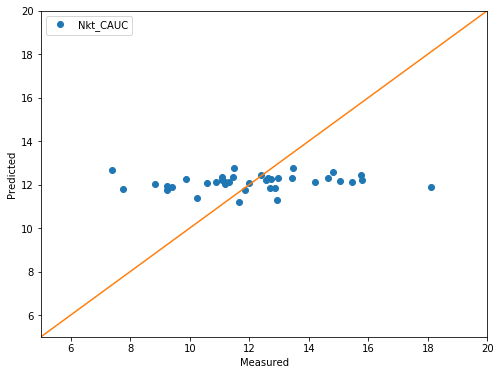

In [27]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(df['Nkt'], results.predict(), 'o', label="Nkt_CAUC");

#ax.plot(df['Nkt'], iv_u, 'o');
#ax.plot(df['Nkt'], iv_l, 'o');
ax.legend(loc='best');
ax.set_ylim([5,20]);
ax.set_xlim([5,20]);
plt.plot([0,30],[0,30]);
plt.xlabel('Measured');
plt.ylabel('Predicted');

In [29]:
fig.savefig('plot3.png')

# Multiple Regression
Instead of running a simple linear model for each predictor, a model can be built that incorporates all of the predictors. Doing this results in Newspaper becoming insignificant.

In [28]:
corr=abs(Nkt_data.loc[Nkt_data['Test']=='CAUC'].corr())
cmap=sns.diverging_palette(5, 256, as_cmap=True)

corr.style.background_gradient(cmap, axis=1)\
    .set_precision(2)\

,Depth,wn,LL,PL,PI,K0,G50,Ir,su,qnet,Nkt,sigma_vo,uo,qt,u2,fs,Qt,Bq,Fr
Depth,1,0.56,0.18,0.13,0.2,0.023,0.67,0.42,0.79,0.79,0.22,0.83,0.84,0.88,0.95,0.59,0.36,0.35,0.26
wn,0.56,1,0.8,0.69,0.8,0.53,0.77,0.56,0.77,0.68,0.26,0.28,0.2,0.69,0.65,0.5,0.14,0.33,0.48
LL,0.18,0.8,1,0.92,0.98,0.8,0.58,0.48,0.52,0.43,0.32,0.093,0.18,0.4,0.33,0.29,0.12,0.22,0.6
PL,0.13,0.69,0.92,1,0.81,0.78,0.52,0.44,0.47,0.4,0.29,0.14,0.23,0.35,0.27,0.28,0.13,0.17,0.57
PI,0.2,0.8,0.98,0.81,1,0.76,0.59,0.48,0.51,0.42,0.33,0.061,0.14,0.39,0.34,0.28,0.11,0.23,0.57
K0,0.023,0.53,0.8,0.78,0.76,1,0.35,0.29,0.4,0.33,0.42,0.23,0.32,0.26,0.084,0.25,0.34,0.088,0.58
G50,0.67,0.77,0.58,0.52,0.59,0.35,1,0.89,0.63,0.56,0.054,0.68,0.57,0.63,0.84,0.27,0.3,0.66,0.58
Ir,0.42,0.56,0.48,0.44,0.48,0.29,0.89,1,0.29,0.24,0.054,0.53,0.43,0.31,0.58,0.036,0.28,0.66,0.53
su,0.79,0.77,0.52,0.47,0.51,0.4,0.63,0.29,1,0.97,0.02,0.49,0.45,0.96,0.81,0.84,0.12,0.16,0.34
qnet,0.79,0.68,0.43,0.4,0.42,0.33,0.56,0.24,0.97,1,0.19,0.45,0.43,0.99,0.8,0.92,0.083,0.071,0.23


In [30]:
df=Nkt_data.loc[Nkt_data['Test']=='CAUC']
results = smf.ols('su ~ qnet', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     su   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     495.6
Date:                Thu, 30 Nov 2017   Prob (F-statistic):           1.22e-22
Time:                        14:42:38   Log-Likelihood:                -106.26
No. Observations:                  38   AIC:                             216.5
Df Residuals:                      36   BIC:                             219.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6623      1.000      1.662      0.105      -0.366       3.691
qnet           0.0754      0.003     22.263      0.000       0.068       0.082
==============================================================================
Omnibus:                       27.345   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.896
Skew:                           1.751   Prob(JB):                     5.98e-14
Kurtosis:                       8.119   Cond. No.                         447.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
df=Nkt_data.loc[Nkt_data['Test']=='CAUC']
results = smf.ols('su ~ wn + PI + qnet + sigma_vo + u2 + Fr', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     su   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     166.7
Date:                Thu, 30 Nov 2017   Prob (F-statistic):           3.50e-22
Time:                        14:43:25   Log-Likelihood:                -90.826
No. Observations:                  38   AIC:                             195.7
Df Residuals:                      31   BIC:                             207.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.7014      3.526      5.588      0.000      12.511      26.892
wn            -0.1134      0.037     -3.028      0.005      -0.190      -0.037
PI            -0.0209      0.046     -0.452      0.654      -0.115       0.073
qnet           0.0731      0.005     13.676      0.000       0.062       0.084
sigma_vo       0.0556      0.018      3.149      0.004       0.020       0.092
u2            -0.0410      0.015     -2.696      0.011      -0.072      -0.010
Fr            -0.3595      0.232     -1.547      0.132      -0.833       0.114
==============================================================================
Omnibus:                       10.863   Durbin-Watson:                   2.341
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               17.283
Skew:                           0.631   Prob(JB):                     0.000177
Kurtosis:                       6.054   Cond. No.                     2.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

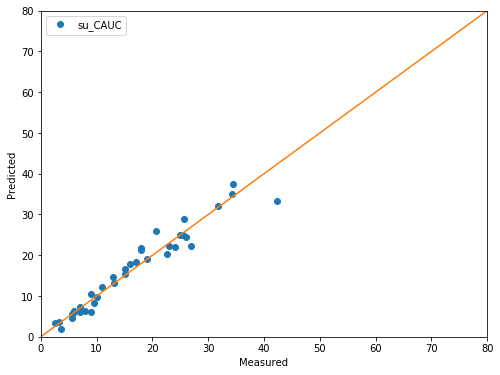

In [32]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(df['su'], results.predict(), 'o', label="su_CAUC");

#ax.plot(df['Nkt'], iv_u, 'o');
#ax.plot(df['Nkt'], iv_l, 'o');
ax.legend(loc='best');
ax.set_ylim([0,80]);
ax.set_xlim([0,80]);
plt.plot([0,80],[0,80]);
plt.xlabel('Measured');
plt.ylabel('Predicted');

In [40]:
df=Nkt_data.loc[Nkt_data['Test']=='CAUC']
results = smf.ols('Nkt ~ wn + PI + qnet + u2 + fs+Fr', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Nkt   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     4.146
Date:                Thu, 30 Nov 2017   Prob (F-statistic):            0.00360
Time:                        14:48:29   Log-Likelihood:                -74.445
No. Observations:                  38   AIC:                             162.9
Df Residuals:                      31   BIC:                             174.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4200      2.915      2.545      0.016       1.474      13.366
wn             0.0473      0.025      1.870      0.071      -0.004       0.099
PI             0.0079      0.028      0.279      0.782      -0.050       0.065
qnet          -0.0319      0.017     -1.864      0.072      -0.067       0.003
u2             0.0227      0.009      2.603      0.014       0.005       0.040
fs             0.4641      0.212      2.194      0.036       0.033       0.895
Fr            -0.4021      0.272     -1.477      0.150      -0.957       0.153
==============================================================================
Omnibus:                        0.819   Durbin-Watson:                   2.317
Prob(Omnibus):                  0.664   Jarque-Bera (JB):                0.751
Skew:                           0.319   Prob(JB):                        0.687
Kurtosis:                       2.741   Cond. No.                     3.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

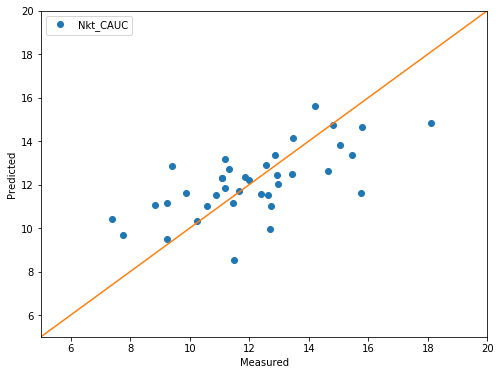

In [41]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(df['Nkt'], results.predict(), 'o', label="Nkt_CAUC");

#ax.plot(df['Nkt'], iv_u, 'o');
#ax.plot(df['Nkt'], iv_l, 'o');
ax.legend(loc='best');
ax.set_ylim([5,20]);
ax.set_xlim([5,20]);
plt.plot([0,30],[0,30]);
plt.xlabel('Measured');
plt.ylabel('Predicted');

In [57]:
df=Nkt_data.loc[Nkt_data['Test']=='CAUE']
results = smf.ols('Nkt ~ PI + u2 + fs + Bq + Fr', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Nkt   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     8.065
Date:                Fri, 17 Nov 2017   Prob (F-statistic):           0.000470
Time:                        16:55:31   Log-Likelihood:                -47.347
No. Observations:                  23   AIC:                             106.7
Df Residuals:                      17   BIC:                             113.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9471      3.993      1.990      0.063      -0.477      16.372
PI             0.0077      0.043      0.179      0.860      -0.083       0.099
u2            -0.0578      0.012     -4.933      0.000      -0.082      -0.033
fs             1.9238      0.331      5.805      0.000       1.225       2.623
Bq            29.8474      7.018      4.253      0.001      15.041      44.654
Fr            -1.7839      0.398     -4.483      0.000      -2.623      -0.944
==============================================================================
Omnibus:                        1.461   Durbin-Watson:                   2.357
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                0.495
Skew:                           0.319   Prob(JB):                        0.781
Kurtosis:                       3.333   Cond. No.                     4.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

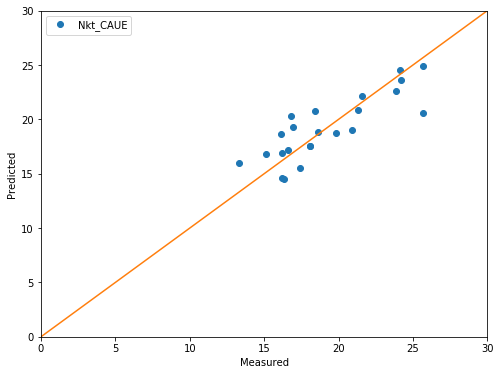

In [58]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(df['Nkt'], results.predict(), 'o', label="Nkt_CAUE");

#ax.plot(df['Nkt'], iv_u, 'o');
#ax.plot(df['Nkt'], iv_l, 'o');
ax.legend(loc='best');
ax.set_ylim([0,30]);
ax.set_xlim([0,30]);
plt.plot([0,30],[0,30]);
plt.xlabel('Measured');
plt.ylabel('Predicted');

In [293]:
df=Nkt_data.loc[Nkt_data['Test']=='SS']
results = smf.ols('Nkt ~ PI + u2 + fs + Bq + Fr', data=df).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Nkt   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     2.645
Date:                Thu, 16 Nov 2017   Prob (F-statistic):             0.0269
Time:                        17:33:01   Log-Likelihood:                -89.343
No. Observations:                  37   AIC:                             196.7
Df Residuals:                      28   BIC:                             211.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2018      8.877      1.037      0.309      -8.983      27.386
wn             0.0487      0.060      0.809      0.425      -0.075       0.172
PI            -0.0040      0.090     -0.044      0.965      -0.188       0.181
qnet          -0.0050      0.050     -0.101      0.920      -0.108       0.097
sigma_vo      -0.0461      0.028     -1.662      0.108      -0.103       0.011
u2             0.0541      0.027      2.014      0.054      -0.001       0.109
fs            -0.1539      0.564     -0.273      0.787      -1.309       1.001
Bq           -13.4220      8.296     -1.618      0.117     -30.416       3.572
Fr             0.6849      0.819      0.836      0.410      -0.993       2.363
==============================================================================
Omnibus:                       22.458   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.266
Skew:                           1.623   Prob(JB):                     1.33e-08
Kurtosis:                       6.604   Cond. No.                     8.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

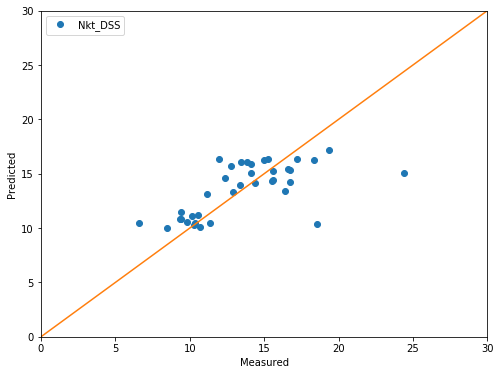

In [294]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(df['Nkt'], results.predict(), 'o', label="Nkt_DSS");

#ax.plot(df['Nkt'], iv_u, 'o');
#ax.plot(df['Nkt'], iv_l, 'o');
ax.legend(loc='best');
ax.set_ylim([0,30]);
ax.set_xlim([0,30]);
plt.plot([0,30],[0,30]);
plt.xlabel('Measured');
plt.ylabel('Predicted');

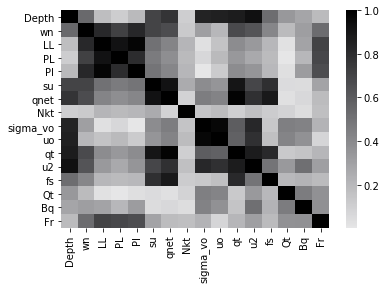

In [295]:
corr=abs(Nkt_data.dropna(axis=1).corr())
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap=sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True));

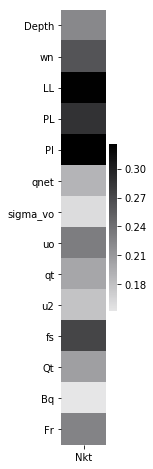

In [38]:
df=Nkt_data.loc[Nkt_data['Test']=='CAUC']
corr=abs(df.dropna(axis=1).corr()[['Nkt']])
plt.subplots(figsize=(1,8))
sns.heatmap(corr.drop(['Nkt','su']),
           xticklabels=corr.columns,
        yticklabels=df.dropna(axis=1).corr().columns.drop(['Nkt','su']), cmap=sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True));

In [352]:
corr.drop(['Nkt','su'])


,Nkt
Depth,0.110097
wn,0.124417
LL,0.213975
PL,0.194920
PI,0.212492
qnet,0.091690
sigma_vo,0.153398
uo,0.184976
qt,0.102713
u2,0.167980


In [368]:
corr=abs(Nkt_data.dropna(axis=1).corr())
cmap=sns.diverging_palette(5, 256, as_cmap=True)

corr.style.background_gradient(cmap, axis=1)\
    .set_precision(2)\


,Depth,wn,LL,PL,PI,su,qnet,Nkt,sigma_vo,uo,qt,u2,fs,Qt,Bq,Fr
Depth,1,0.54,0.17,0.11,0.2,0.7,0.77,0.11,0.85,0.86,0.87,0.93,0.53,0.34,0.28,0.19
wn,0.54,1,0.82,0.71,0.83,0.7,0.67,0.12,0.31,0.21,0.67,0.63,0.42,0.19,0.32,0.53
LL,0.17,0.82,1,0.92,0.97,0.51,0.42,0.21,0.028,0.16,0.39,0.34,0.21,0.025,0.29,0.7
PL,0.11,0.71,0.92,1,0.81,0.47,0.38,0.19,0.069,0.2,0.34,0.26,0.19,0.0056,0.21,0.69
PI,0.2,0.83,0.97,0.81,1,0.5,0.42,0.21,0.0021,0.12,0.39,0.35,0.2,0.035,0.33,0.66
su,0.7,0.7,0.51,0.47,0.5,1,0.92,0.26,0.39,0.35,0.9,0.69,0.79,0.05,0.046,0.29
qnet,0.77,0.67,0.42,0.38,0.42,0.92,1,0.092,0.46,0.43,0.98,0.79,0.89,0.032,0.061,0.18
Nkt,0.11,0.12,0.21,0.19,0.21,0.26,0.092,1,0.15,0.18,0.1,0.17,0.12,0.088,0.044,0.17
sigma_vo,0.85,0.31,0.028,0.069,0.0021,0.39,0.46,0.15,1,0.97,0.6,0.83,0.13,0.45,0.44,0.22
uo,0.86,0.21,0.16,0.2,0.12,0.35,0.43,0.18,0.97,1,0.58,0.79,0.17,0.42,0.37,0.08
